# <center>3. Знакомимся с новыми данными: коронавирус

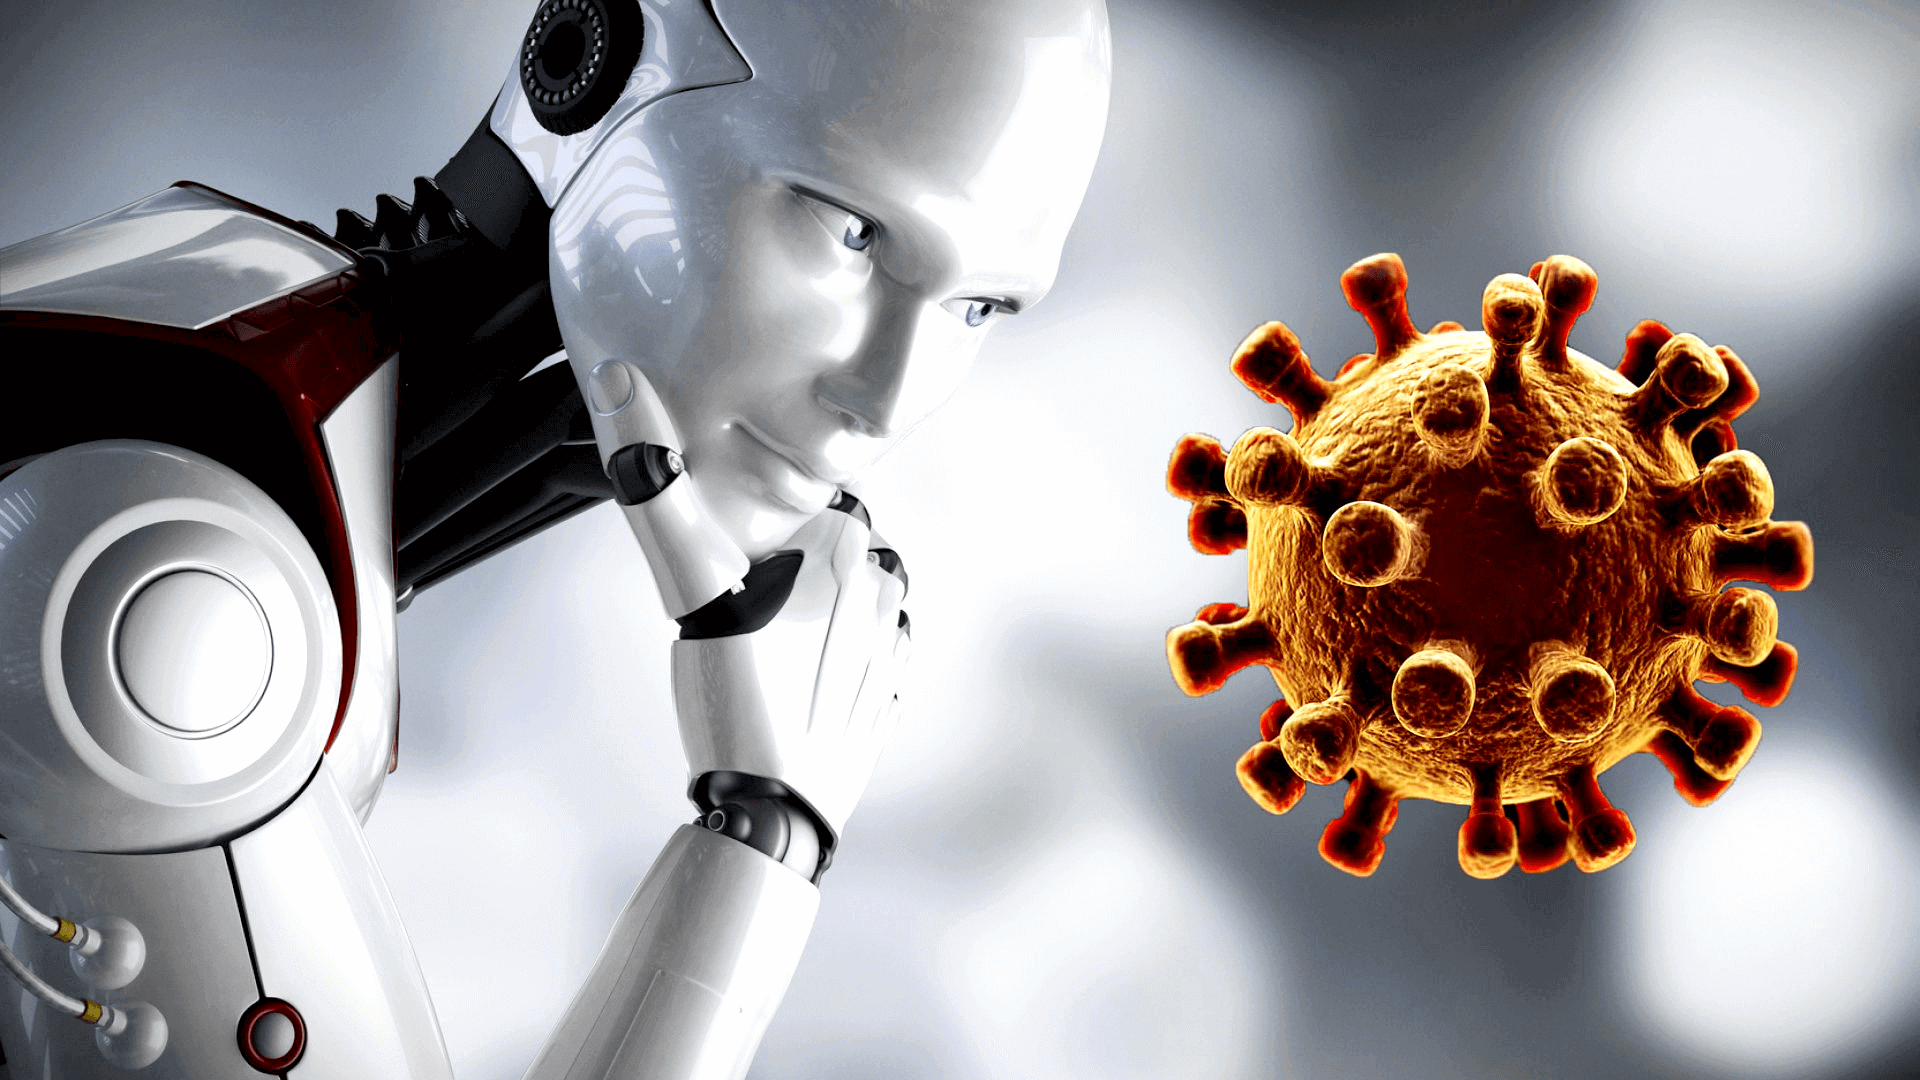

In [10]:
from IPython.display import Image
Image("data/dst3-u1-md13_3_1.png")

Мы будем изучать методы визуализации, используя два набора данных:
1. covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран. 

In [9]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0
